In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Day 20_E-Commerce_Data.csv")  # Replace with actual filename
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08


In [4]:
print(df.isna().sum())  # Check missing values in each column


Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64


In [6]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())  # Median for ordinal data
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].mean())  # Mean for age


In [8]:
df['Customer_Age']

0      58.0
1      20.0
2      51.0
3      35.0
4      32.0
       ... 
500    41.0
501    56.0
502    26.0
503    24.0
504    55.0
Name: Customer_Age, Length: 505, dtype: float64

In [10]:
df['Rating']

0      3.0
1      3.0
2      2.0
3      3.0
4      4.0
      ... 
500    4.0
501    1.0
502    3.0
503    3.0
504    1.0
Name: Rating, Length: 505, dtype: float64

In [12]:
def correct_spelling(text):
    if pd.isna(text) or not isinstance(text, str):
        return np.nan  # Keep NaN if text is missing
    return str(TextBlob(text).correct())

df['Review_Text'] = df['Review_Text'].apply(correct_spelling)  # Apply spelling correction
df['Review_Text'] = df['Review_Text'].fillna("No review provided")  # Fill remaining NaNs


In [14]:
# Identify duplicates
duplicates = df[df.duplicated(subset=['Review_Text'], keep=False)]
print(f"Number of duplicate reviews: {len(duplicates)}")

# Drop exact duplicates
df = df.drop_duplicates(subset=['Review_Text'], keep='first')


Number of duplicate reviews: 505


In [18]:
df.loc[:, 'Rating'] = df['Rating'].clip(1, 5)  # Ensures modification on the actual DataFrame


In [20]:
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
5,6,Beauty,4952.0,42.0,1.0,Last delivery,2023-01-06
55,56,Electronics,330.0,19.0,3.0,No review provided,2023-02-25


In [24]:
df.loc[:, 'Product_Category'] = df['Product_Category'].apply(lambda x: str(TextBlob(str(x)).correct()))
df.loc[:, 'Product_Category'] = df['Product_Category'].str.strip().str.title()


In [26]:
df.loc[:, 'Product_Category']

0        Clothing
1        Clothing
2     Some Record
4     Electronics
5          Beauty
55    Electronics
Name: Product_Category, dtype: object

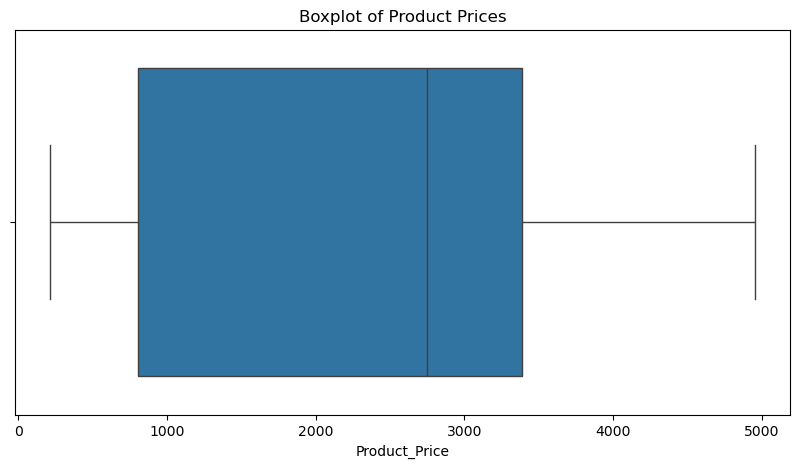

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Product_Price'])
plt.title("Boxplot of Product Prices")
plt.show()


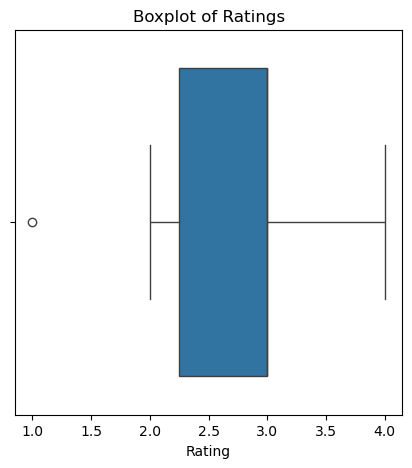

In [30]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['Rating'])
plt.title("Boxplot of Ratings")
plt.show()


In [32]:
Q1 = df['Product_Price'].quantile(0.25)
Q3 = df['Product_Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme outliers
df = df[(df['Product_Price'] >= lower_bound) & (df['Product_Price'] <= upper_bound)]


In [34]:
df = pd.get_dummies(df, columns=['Product_Category'], drop_first=True)  # One-hot encoding


In [36]:
df

,Order_ID,Product_Price,Customer_Age,Rating,Review_Text,Order_Date,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Some Record
0,1,3262.0,58.0,3.0,Would not recommend,2023-01-01,True,False,False
1,2,214.0,20.0,3.0,Excellent product!,2023-01-02,True,False,False
2,3,3429.0,51.0,2.0,Value for money,2023-01-03,False,False,True
4,5,2237.0,32.0,4.0,Not as expected,2023-01-05,False,True,False
5,6,4952.0,42.0,1.0,Last delivery,2023-01-06,False,False,False
55,56,330.0,19.0,3.0,No review provided,2023-02-25,False,True,False


In [38]:
df.to_csv("cleaned_ecommerce_reviews.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
